In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pickle
from sklearn.metrics import mean_squared_error

In [3]:
import glob
import pickle

# Load all history files
history_files = sorted(glob.glob('CNN_MODEL/history_epoch_*.pkl'))

val_losses = []

for file in history_files:
    with open(file, 'rb') as f:
        epoch_history = pickle.load(f)
    val_losses.append(epoch_history['val_loss'][-1])  # Assuming last value per epoch is relevant

# Find best epoch
best_epoch = int(history_files[val_losses.index(min(val_losses))].split('_')[-1].split('.')[0])
best_val_loss = min(val_losses)

print(f"✅ Best Epoch: {best_epoch}")
print(f"📉 Best Validation Loss: {best_val_loss:.6f}")


✅ Best Epoch: 94
📉 Best Validation Loss: 0.693865


In [4]:
model = tf.keras.models.load_model(f'CNN_MODEL/model_epoch_{best_epoch}.h5')
model.summary()  # optional

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 1000)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 100, 64)   │      2,688 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1000, 64)  │      1,344 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 100, 128)  │     41,088 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 1000, 128) │     73,856 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 100, 128)  │        512 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1000, 128) │        512 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 100, 128)  │     82,048 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 1000, 128) │    147,584 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 128)       │          0 │ conv1d_3[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 256)       │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │     65,792 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_1[0][0]   

 Total params: 449,475 (1.71 MB)

 Trainable params: 448,449 (1.71 MB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 2 (12.00 B)

In [5]:
df = pd.read_csv('test_dataset.csv')

In [6]:
smiles_list = df['SMILES'].tolist()
protein_list = df['target_sequence'].tolist()

In [7]:
# Encode SMILES
smiles_chars = sorted(set(''.join(df['SMILES'])))
char_to_int_smiles = {c: i + 1 for i, c in enumerate(smiles_chars)}

def encode_smiles(smiles):
    return [char_to_int_smiles.get(c, 0) for c in smiles]

df['smiles_encoded'] = df['SMILES'].apply(encode_smiles)

# Encode protein sequence
aa_list = 'ACDEFGHIKLMNPQRSTVWY'
aa_to_int = {aa: i + 1 for i, aa in enumerate(aa_list)}

def encode_protein(seq):
    return [aa_to_int.get(aa, 0) for aa in seq]

df['protein_encoded'] = df['target_sequence'].apply(encode_protein)

# Pad
max_len_smiles = 100
max_len_protein = 1000

X_smiles_test = pad_sequences(df['smiles_encoded'], maxlen=max_len_smiles, padding='post')
X_protein_test = pad_sequences(df['protein_encoded'], maxlen=max_len_protein, padding='post')
y_test = df['Kd'].values

In [8]:
# Predict
y_pred = model.predict([X_smiles_test, X_protein_test]).flatten()

192/192 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

Mean Squared Error: 0.7188
Mean Absolute Error: 0.5393
Root Mean Squared Error: 0.8478


C:\Users\NongNam\AppData\Local\Temp\ipykernel_26212\1715855994.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label="True Kd", shade=True)
C:\Users\NongNam\AppData\Local\Temp\ipykernel_26212\1715855994.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label="Predicted Kd", shade=True)


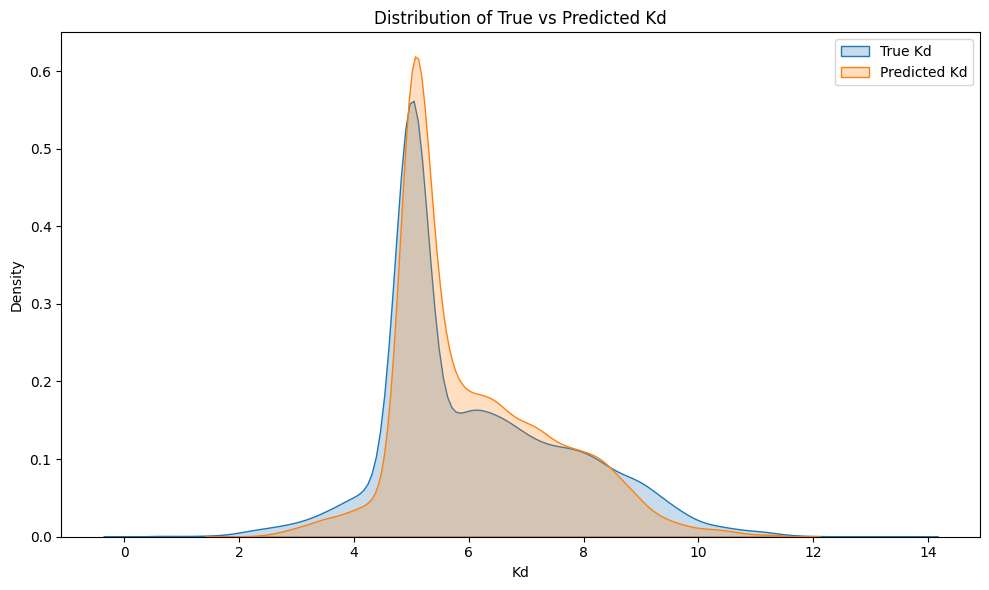

In [10]:
# Plot real vs predicted distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label="True Kd", shade=True)
sns.kdeplot(y_pred, label="Predicted Kd", shade=True)
plt.title("Distribution of True vs Predicted Kd")
plt.xlabel("Kd")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

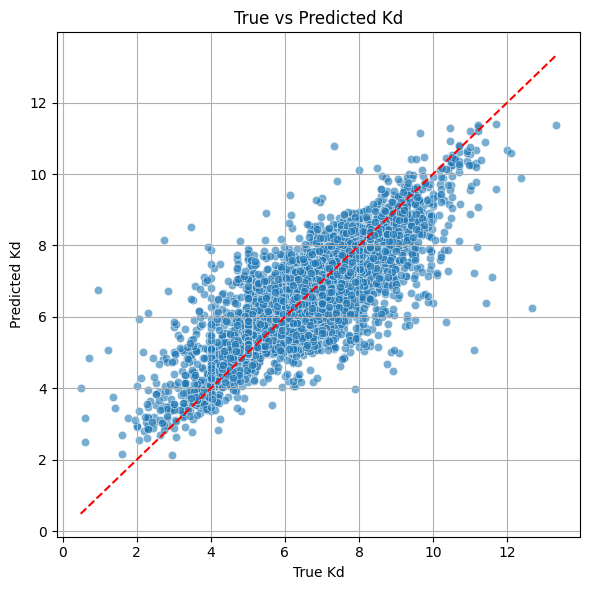

In [11]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # y = x line
plt.xlabel("True Kd")
plt.ylabel("Predicted Kd")
plt.title("True vs Predicted Kd")
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
mse = mean_squared_error(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")

Test MSE: 0.7188


In [14]:
import numpy as np
import pandas as pd

errors = np.abs(y_test - y_pred)
df_error = pd.DataFrame({
    'SMILES': smiles_list,
    'Protein': protein_list,
    'True_Kd': y_test,
    'Pred_Kd': y_pred,
    'Abs_Error': errors
})


In [15]:
df_error['Error_Level'] = pd.cut(
    df_error['Abs_Error'],
    bins=[0, 0.5, 1, 2, 5, np.inf],
    labels=['Excellent', 'Good', 'Moderate', 'Poor', 'Very Poor']
)


In [16]:
from rdkit import Chem
from rdkit.Chem import Descriptors

def smiles_to_features(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return pd.Series([np.nan]*5)
    return pd.Series([
        Descriptors.MolWt(mol),
        Descriptors.NumHDonors(mol),
        Descriptors.NumHAcceptors(mol),
        Descriptors.TPSA(mol),
        Descriptors.FractionCSP3(mol)
    ])

df_error[['MolWt', 'HDonors', 'HAcceptors', 'TPSA', 'CSP3']] = df_error['SMILES'].apply(smiles_to_features)


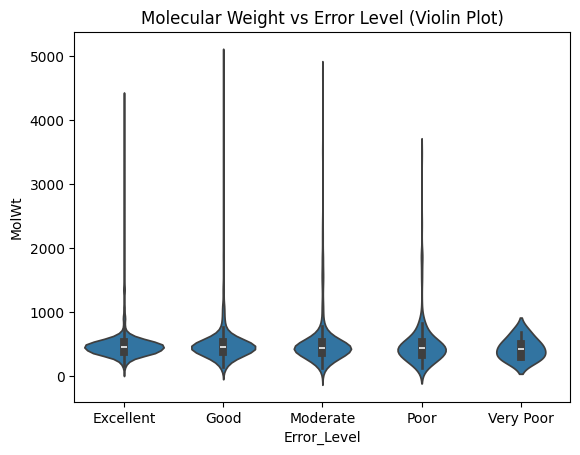

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='Error_Level', y='MolWt', data=df_error)
plt.title('Molecular Weight vs Error Level (Violin Plot)')
plt.show()


In [33]:
df_error['Prot_Length'] = df_error['Protein'].apply(len)

       Feature  t-statistic   p-value
0  Prot_Length     1.851789  0.065114
1        MolWt    -0.001690  0.998653
2      HDonors    -2.402667  0.016968
3   HAcceptors    -0.905547  0.365990
4         TPSA    -2.170478  0.030862
5         CSP3    -4.333784  0.000021


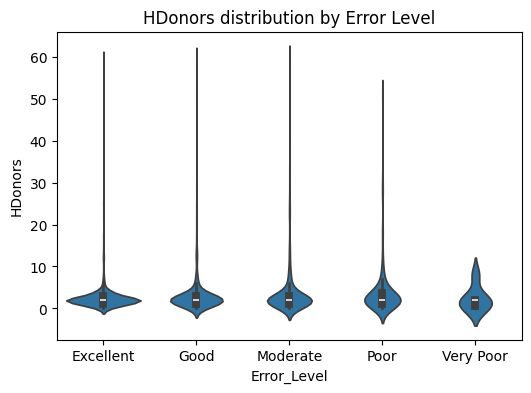

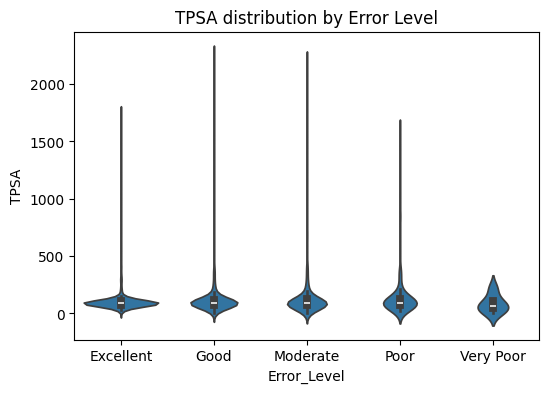

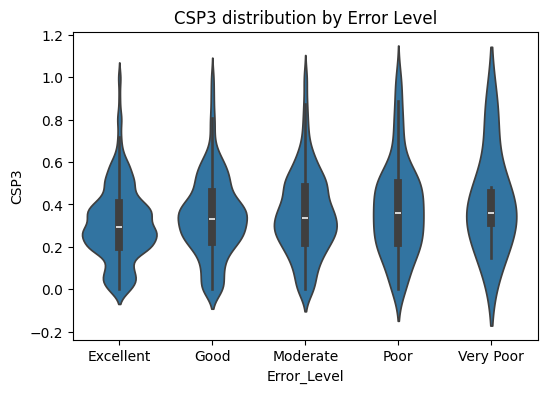

In [36]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df_error has these columns: 
# 'Abs_Error', 'MolWt', 'Prot_Length', 'Num_Rings', etc.

# Define error groups, e.g.:
low_error = df_error[df_error['Error_Level'].isin(['Excellent', 'Good'])]
high_error = df_error[df_error['Error_Level'].isin(['Poor', 'Very Poor'])]

features = ['Prot_Length', 'MolWt', 'HDonors', 'HAcceptors', 'TPSA', 'CSP3']  # add your features here

results = []

for feat in features:
    group1 = low_error[feat].dropna()
    group2 = high_error[feat].dropna()
    stat, p = ttest_ind(group1, group2, equal_var=False)
    results.append({'Feature': feat, 't-statistic': stat, 'p-value': p})

results_df = pd.DataFrame(results)
print(results_df)

# Filter significant features (p < 0.05)
sig_features = results_df[results_df['p-value'] < 0.05]['Feature'].tolist()

# Plot significant features
for feat in sig_features:
    plt.figure(figsize=(6,4))
    sns.violinplot(x='Error_Level', y=feat, data=df_error)
    plt.title(f'{feat} distribution by Error Level')
    plt.show()
